#  TP1 : Ingénierie des Connaissances

### Réalisé par : **Nassima RHANNOUCH**  
Filière : **Informatique et Ingénierie des Données (IID3)**  

---

## 📝 Énoncé de l’exercice

On souhaite concevoir un **système flou** utilisant la bibliothèque **scikit-fuzzy (skfuzzy)** pour modéliser le comportement d’un **climatiseur** selon la température ambiante.

### Données du problème :
- **Variable d’entrée** : Température (°C), définie sur l’intervalle [10, 50]  
  - Froid : [10, 10, 20]  
  - Agréable : [15, 25, 30]  
  - Chaud : [27, 50, 50]  

- **Variable de sortie** : Vitesse du climatiseur (0 à 100 %)  
  - Faible : [0, 0, 40]  
  - Moyenne : [30, 50, 70]  
  - Élevée : [60, 100, 100]  

### Objectif :
Déterminer la **vitesse du climatiseur** lorsque la température est de **17°C**, en appliquant les **règles floues** suivantes :
1. Si la température est *froid*, alors la vitesse est *faible*.  
2. Si la température est *agréable*, alors la vitesse est *moyenne*.  
3. Si la température est *chaud*, alors la vitesse est *élevée*.

---

 **Plan du notebook :**
1. Définition des ensembles flous et fonctions d’appartenance.  
2. Implémentation du système flou avec `skfuzzy`.  
3. Calcul manuel de la défuzzification pour T = 17°C.  
4. Visualisation graphique des résultats.


##  Installation des bibliothèques nécessaires

Avant de commencer l’implémentation du système flou, nous devons installer la bibliothèque **scikit-fuzzy**, qui permet de manipuler des ensembles flous, créer des fonctions d’appartenance et construire des systèmes d’inférence floue.

In [32]:
! pip install scikit-fuzzy

##  Importation des bibliothèques

Une fois la bibliothèque **scikit-fuzzy** installée, nous importons les modules nécessaires pour notre TP :

- **NumPy** : pour gérer les tableaux et les calculs numériques.  
- **scikit-fuzzy (fuzz)** : pour créer et manipuler les ensembles flous.  
- **control** : pour construire le système d’inférence floue (règles, entrées, sorties).  
- **Matplotlib** : pour tracer les fonctions d’appartenance et visualiser les résultats.


In [33]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

##  Définition des variables linguistiques

Nous définissons maintenant les **variables floues**  utilisées dans notre système :

- **Température** : variable d’entrée (*Antecedent*), définie sur l’intervalle [10, 50] °C.  
- **Vitesse** : variable de sortie (*Consequent*), définie sur l’intervalle [0, 100] %.

Ces variables serviront à modéliser le comportement du climatiseur selon la température ambiante.


In [34]:
temperature = ctrl.Antecedent(np.arange(10, 51, 1), 'temperature')
vitesse = ctrl.Consequent(np.arange(0, 101, 1), 'vitesse')

##  Définition des fonctions d'appartenance pour la température

Pour chaque variable linguistique, nous définissons des **ensembles flous** à l'aide de **fonctions triangulaires (trimf)** :

- **Froid** : représenté par le triangle [10, 10, 20]  
- **Agréable** : représenté par le triangle [15, 25, 30]  
- **Chaud** : représenté par le triangle [27, 50, 50]  

Ces ensembles permettront au système flou de déterminer à quel degré une température donnée appartient à chaque catégorie.


In [35]:
temperature['froid'] = fuzz.trimf(temperature.universe, [10, 10, 20])
temperature['agreable'] = fuzz.trimf(temperature.universe, [15, 25, 30])
temperature['chaud'] = fuzz.trimf(temperature.universe, [27, 50, 50])

##  Définition des fonctions d'appartenance pour la vitesse

De même, pour la **vitesse du climatiseur** (variable de sortie), nous définissons des **ensembles flous** avec des fonctions triangulaires :

- **Faible** : triangle [0, 0, 40]  
- **Moyenne** : triangle [30, 50, 70]  
- **Élevée** : triangle [60, 100, 100]  

Ces ensembles permettront au système flou de déterminer la vitesse correspondante en fonction de la température.


In [36]:
vitesse['faible'] = fuzz.trimf(vitesse.universe, [0, 0, 40])
vitesse['moyenne'] = fuzz.trimf(vitesse.universe, [30, 50, 70])
vitesse['elevee'] = fuzz.trimf(vitesse.universe, [60, 100, 100])

##  Visualisation des fonctions d'appartenance

Avant de définir les règles floues, il est utile de **visualiser les fonctions d’appartenance** :

- `temperature.view()` : affiche les ensembles flous **Froid, Agréable, Chaud**.  
- `vitesse.view()` : affiche les ensembles flous **Faible, Moyenne, Élevée**.  

Cela permet de vérifier graphiquement que les fonctions triangulaires sont correctement définies et couvrent bien tout l’intervalle.


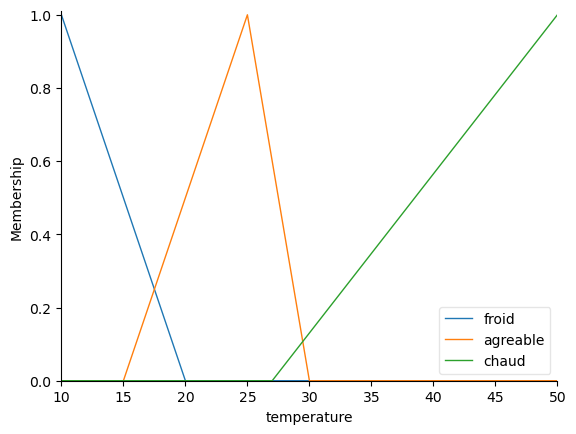

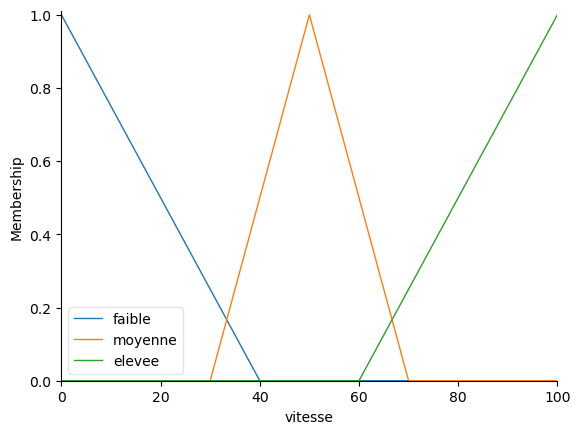

In [37]:
temperature.view()
vitesse.view()

##  Définition des règles floues

Nous définissons maintenant les **règles d’inférence floue** pour notre système :

1. Si la température est **Froid**, alors la vitesse est **Faible**  
2. Si la température est **Agréable**, alors la vitesse est **Moyenne**  
3. Si la température est **Chaud**, alors la vitesse est **Élevée**  

Ces règles permettent au système flou de déterminer la vitesse du climatiseur en fonction de la température mesurée.


In [38]:
regle1 = ctrl.Rule(temperature['froid'], vitesse['faible'])
regle2 = ctrl.Rule(temperature['agreable'], vitesse['moyenne'])
regle3 = ctrl.Rule(temperature['chaud'], vitesse['elevee'])

##  Création du système de contrôle flou

Après avoir défini les variables et les règles, nous créons le **système de contrôle flou** :

- `ControlSystem([regle1, regle2, regle3])` : regroupe toutes les règles floues dans un seul système.  
- `ControlSystemSimulation(systeme_ctrl)` : prépare la simulation pour tester le système avec des valeurs d’entrée spécifiques.

Cette étape permet ensuite de calculer la sortie floue correspondant à une température donnée.


In [39]:
systeme_ctrl = ctrl.ControlSystem([regle1, regle2, regle3])
simulation = ctrl.ControlSystemSimulation(systeme_ctrl)

##  Entrée de la température et calcul de la vitesse

Nous allons maintenant **donner une valeur spécifique à la température** et calculer la vitesse correspondante du climatiseur :

- `simulation.input['temperature'] = 17` : on fixe la température à 17°C.  
- `simulation.compute()` : calcule la vitesse en appliquant les fonctions d’appartenance et les règles floues définies précédemment.

Le résultat sera stocké dans `simulation.output['vitesse']`.


In [40]:
simulation.input['temperature'] = 17
simulation.compute()

Pour une température de 17°C, la vitesse de climatiseur est de : 30.57


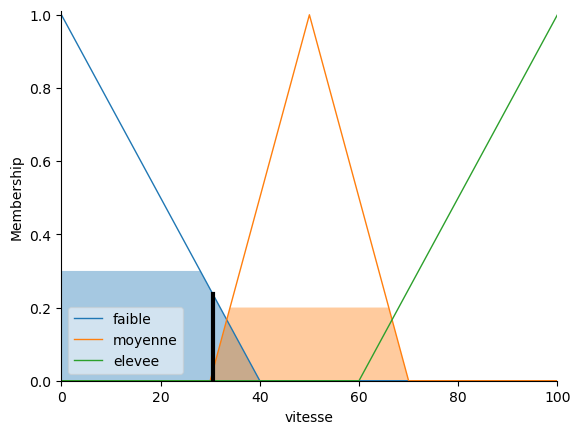

In [41]:
print(f"Pour une température de 17°C, la vitesse de climatiseur est de : {simulation.output['vitesse']:.2f}")
vitesse.view(sim=simulation)
plt.show()